# Train Model-Development

In [39]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline 

In [12]:
#read data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [13]:
#linear model object
model=LinearRegression()
model

LinearRegression()

### How could "highway-mpg" help us predict car price?

In [14]:
X=df[['highway-mpg']]
Y=df['price']


In [15]:
#fit
model.fit(X,Y)

LinearRegression()

In [17]:
#output prediction
Yhat=model.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [18]:
#  value of the intercept (a)?
model.intercept_

38423.305858157386

In [20]:
#slope b
model.coef_

array([-821.73337832])

In [21]:
#linear regression object called "model1".
model1=LinearRegression()
model1

LinearRegression()

In [22]:
#model using "engine-size" as the independent variable and "price" as the dependent variable
model1.fit(df[['engine-size']],df['price'])

LinearRegression()

In [26]:
#the slope and intercept of the model.
# Slope 
display(model1.coef_)

# Intercept
display(model1.intercept_)

array([166.86001569])

-7963.338906281049

In [29]:
# the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

we know that other good predictors of price could be: <br>
<br>
Horsepower<br>
Curb-weight<br>
Engine-size<br>
Highway-mpg<br>
Let's develop a model using these variables as the predictor variables.

In [31]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [33]:
#Fit the linear model 
model.fit(Z,df.price)

LinearRegression()

In [34]:
#intercept(a)?
model.intercept_

-15806.624626329198

In [35]:
#coefficients (b1, b2, b3, b4)
model.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [36]:
model2 = LinearRegression()
model2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [37]:
# coefficient of the model.
model2.coef_

array([   1.49789586, -820.45434016])

### Regression Plot

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0.0, 48175.11949497856)

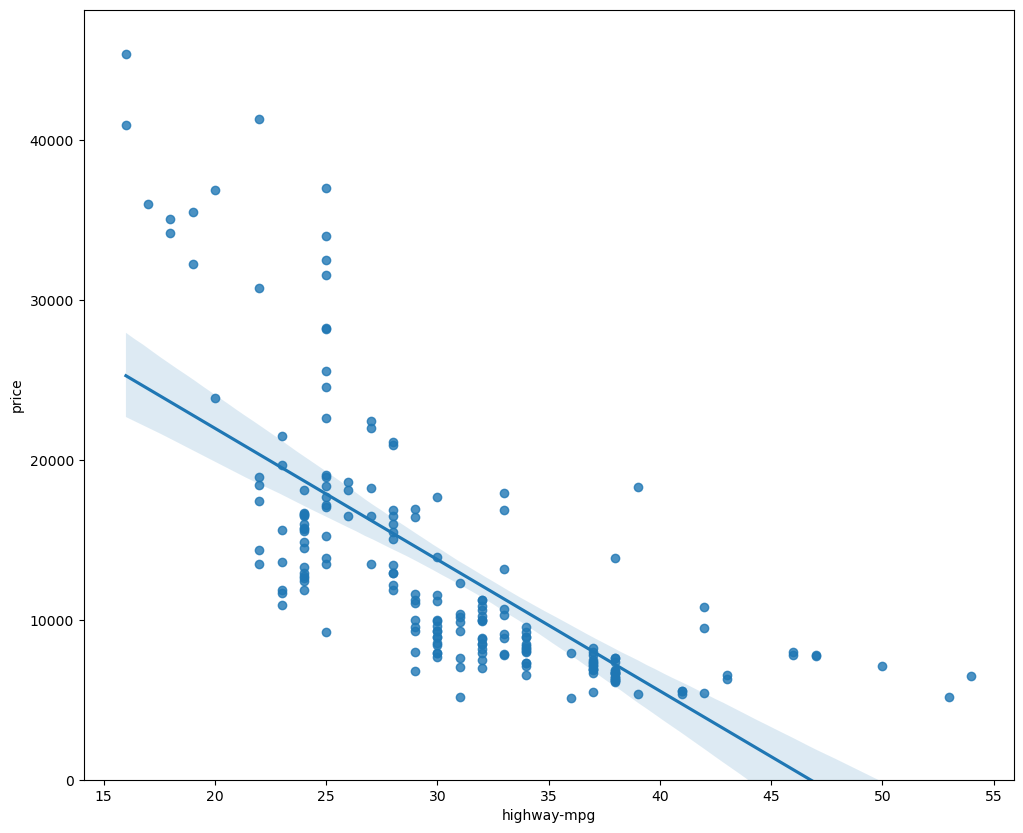

In [43]:
#Let's visualize highway-mpg as potential predictor variable of price:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

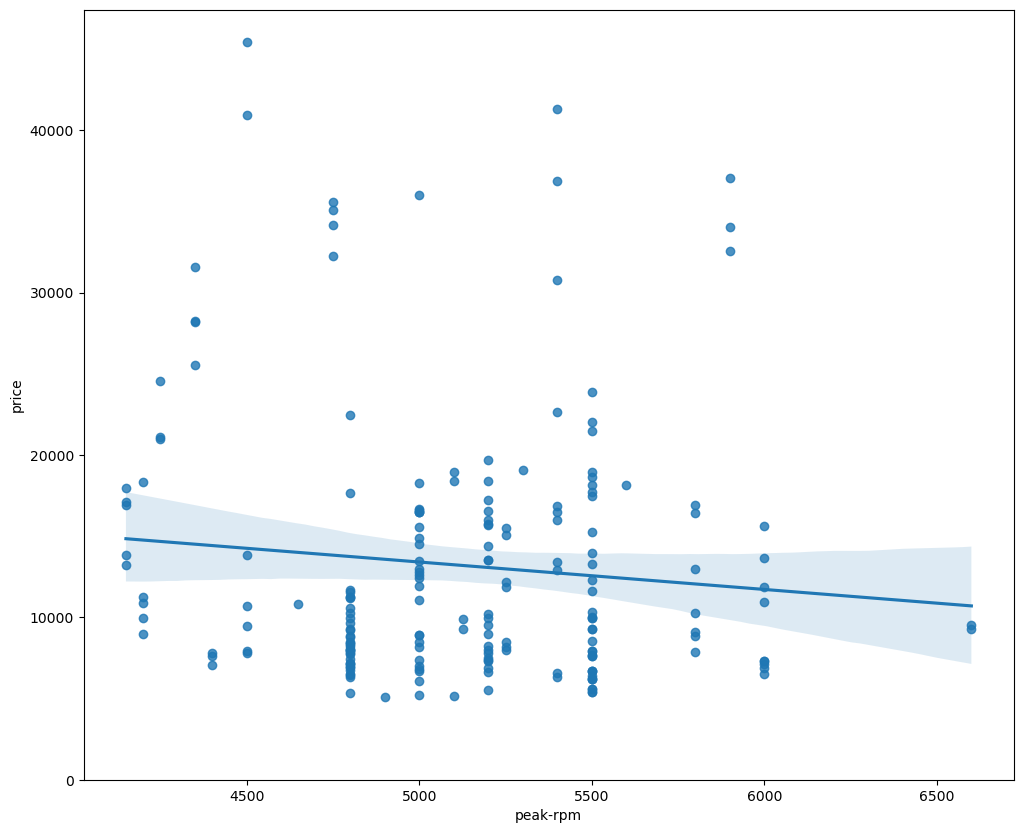

In [44]:
#Let's compare this plot to the regression plot of "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [45]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [6]:
columns_name=list(df.columns)
columns_name.sort()
columns_name

['aspiration',
 'body-style',
 'bore',
 'city-L/100km',
 'city-mpg',
 'compression-ratio',
 'curb-weight',
 'diesel',
 'drive-wheels',
 'engine-location',
 'engine-size',
 'engine-type',
 'fuel-system',
 'gas',
 'height',
 'highway-mpg',
 'horsepower',
 'horsepower-binned',
 'length',
 'make',
 'normalized-losses',
 'num-of-cylinders',
 'num-of-doors',
 'peak-rpm',
 'price',
 'stroke',
 'symboling',
 'wheel-base',
 'width']